In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1)

In [33]:
X 

array([[ 0.76602365,  1.55297466],
       [-0.96889981, -0.77800378],
       [ 0.94411487, -0.98708838],
       ...,
       [ 1.23127356, -0.85833296],
       [ 0.88625579,  1.36790744],
       [-1.01902335, -0.77425424]])

In [38]:
y

array([0, 1, 0, ..., 0, 0, 1])

<Axes: xlabel='0', ylabel='1'>

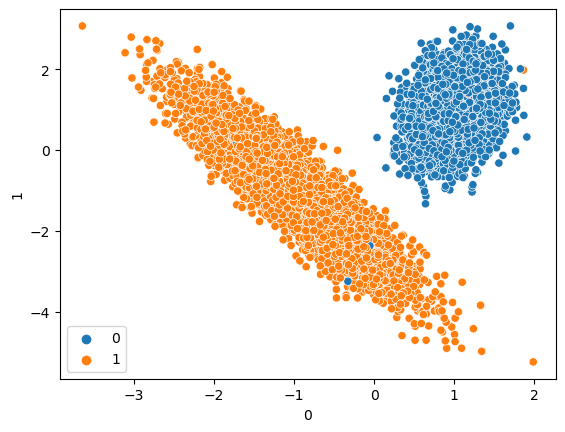

In [32]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm_model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9925
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1016
           1       0.99      0.99      0.99       984

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## Model Accuracy is around 99% becasue its easy linearly separable data.

## Now changing the data little bit to see how the model performs

In [73]:
X,y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

<Axes: xlabel='0', ylabel='1'>

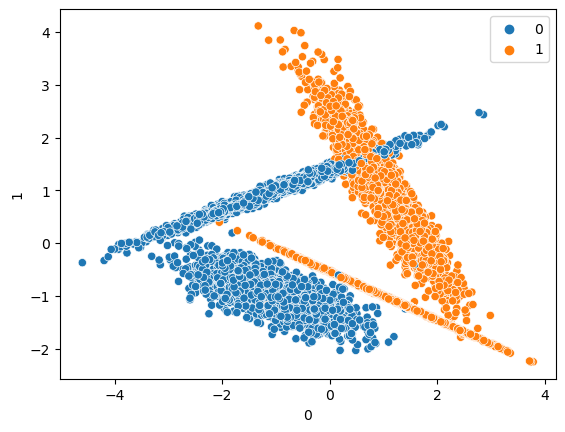

In [74]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.svm import SVC 
svm_linear_model = SVC(kernel='linear')

In [77]:
svm_linear_model.fit(X_train, y_train)
y_pred = svm_linear_model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.906
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       979
           1       0.90      0.92      0.91      1021

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



## i got 91% accuracy with linear kernel

## What if i change the kernel to rbf


In [ ]:
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train,y_train)
y_pred_rbf = svm_rbf_model.predict(X_test)
print("Accuracy with RBF kernel:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report with RBF kernel:\n", classification_report(y_test, y_pred_rbf))

Accuracy with RBF kernel: 0.9765
Classification Report with RBF kernel:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       979
           1       0.96      1.00      0.98      1021

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



## yeh, i got 98% accuracy with rbf kernel

## Now use GridSearchCV to find the best hyperparameters

In [83]:
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10,100,1000, 10000],
    'kernel': ['rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 10000, 'gamma': 1, 'kernel': 'rbf'}

In [85]:
y_pred_grid = grid.predict(X_test)
print("Accuracy with Grid Search:", accuracy_score(y_test, y_pred_grid))
print("Classification Report with Grid Search:\n", classification_report(y_test, y_pred_grid))

Accuracy with Grid Search: 0.982
Classification Report with Grid Search:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       979
           1       0.99      0.98      0.98      1021

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



## I got 98% accuracy with hyeprparameter tuning